In [63]:
!pip install pulp

# Atividade: Local Branching manual em um problema de mochila binária

Nesta tarefa, vamos aplicar Local Branching manualmente em um problema de mochila binária multidimensional.

 **ATENÇÃO: Não é para programar é para usar o código para adicionar as restrições de Local Branching e resolver a relaxação linear.**

## Contexto do problema

Considere o seguinte problema de mochila:
* Tipo: mochila 0–1 (binária)
* Número de itens: 15
* Número de restrições (capacidades): 10

## O modelo matemático é:

\begin{aligned}
\max \quad & \sum_{i=1}^{15} p_i x_i \\
\text{sujeito a} \quad
& \sum_{i=1}^{15} a_{j i} x_i \le b_j, \quad j = 1,\dots,10 \\
& x_i \in \{0,1\}, \quad i = 1,\dots,15
\end{aligned}

## Na implementação em Python, temos:
* $profits[i] = p_i$
* $weights[j][i] = a_{j i}$
* $capacities[j] = b_j$
* $x_i$ são variáveis binárias no modelo inteiro (mas, na relaxação linear, $0 \le x_i \le 1$).

⸻

## Ideia geral da atividade

Vamos construir a árvore de Local Branching à mão


## Solução inicial

1. Use a solução S0 = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1] como solução inicial

In [64]:
# mdkp_model.py
# Modelo de Programação Inteira Binária para o
# problema da Mochila Multidimensional (15 itens, 10 restrições)

import pulp

# -----------------------------
# 1. Dados do problema
# -----------------------------
N_ITEMS = 15
M_CONS = 10

# Lucros p_i
profits = [
    50, 17, 11, 57, 27,
    25, 24, 18, 57, 16,
    53, 57, 44, 15, 47
]

# Pesos a_{j,i}: lista de listas (cada linha = restrição j)
weights = [
    # j = 0
    [14,  2,  1,  3,  7,  8, 17, 20,  1, 18,  7, 18, 14,  8, 15],
    # j = 1
    [19,  9,  1,  6, 14, 11,  9,  5,  7, 11,  4,  3, 13,  4, 12],
    # j = 2
    [12, 20,  9,  2, 15, 18,  4, 13,  3, 18, 10, 20, 12, 19,  7],
    # j = 3
    [ 3,  2,  8, 10,  3,  8,  4, 13,  9, 15, 12,  6, 12, 12,  7],
    # j = 4
    [ 9,  3, 20,  6, 18,  8,  6, 15, 13,  9, 18,  8, 11,  2,  8],
    # j = 5
    [ 2, 11, 13,  9,  3,  7, 19, 11,  7, 16, 13, 15,  5,  9,  5],
    # j = 6
    [ 8, 18, 18,  9, 19, 14, 19, 13, 12,  8,  5, 17, 16,  3,  2],
    # j = 7
    [ 4,  5,  6, 14, 20,  3, 13, 13, 20, 15, 17,  9, 18,  1,  4],
    # j = 8
    [18,  9, 11,  4, 10, 14,  6, 15,  1,  9, 17,  6, 17,  4, 10],
    # j = 9
    [17, 20,  7,  5, 12,  6, 18, 17,  1, 20, 11, 16,  1,  4, 12],
]

capacities = [
    64, 60, 48, 60, 70,
    50, 76, 49, 79, 53
]

# -----------------------------
# 2. Criação do modelo MIP
# -----------------------------
def build_mdkp_model():
    # Modelo de maximização
    model = pulp.LpProblem("MDKP_15x10", pulp.LpMaximize)

    # Variáveis binárias x_i
    x = [
        pulp.LpVariable(f"x_{i}", lowBound=0, upBound=1, cat=pulp.LpBinary)
        for i in range(N_ITEMS)
    ]

    # Função objetivo: max sum_i p_i x_i
    model += pulp.lpSum(profits[i] * x[i] for i in range(N_ITEMS)), "Objetivo"

    # Restrições de capacidade: sum_i a_{j,i} x_i <= b_j
    for j in range(M_CONS):
        model += (
            pulp.lpSum(weights[j][i] * x[i] for i in range(N_ITEMS))
            <= capacities[j],
            f"cap_{j}"
        )

    return model, x

# -----------------------------
# 3. Construção do modelo
# -----------------------------

if __name__ == "__main__":
    model, x = build_mdkp_model()
    solver = pulp.PULP_CBC_CMD(msg=True)  # msg=True mostra o log
    #model.solve(solver)

    #print("\nSolução x_i:")
    #for i in range(N_ITEMS):
    #    print(f"x_{i} = {pulp.value(x[i]):.4f}")

# Não é para resolver o modelo acima

Pois ele é pequeno e o solver vai dar conta. Queremos resolvê-lo usando uma versão manual do Local Branching

## Primeiro local Brach à esquerda

In [65]:
# Faz uma cópia do modelo original já construído e resolvido anteriormente.
# Isso é importante porque vamos adicioanr uma restrição
# sem modificar o modelo original.
model0 = model.copy()

# Adiciona ao novo modelo uma restrição de local Branching:
#Solucão inicial:
#S0 = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1]

model0 += pulp.LpConstraint(
    (1 - x[0]) +
    (x[1]) +
    (x[2]) +
    (x[3]) +
    (x[4]) +
    (x[5]) +
    (x[6]) +
    (x[7]) +
    (x[8]) +
    (x[9]) +
    (x[10]) +
    (x[11]) +
    (x[12]) +
    (x[13]) +
    (1 - x[14])
    <= 2)

#Exporta o LP só para verificar a restrição
model0.writeLP("local_branching_debug.lp")

# Resolve o modelo modificado usando o mesmo solver
model0.solve(solver)

# Imprime o status da solução (Optimal, Infeasible, Unbounded etc.)
print("Status:", pulp.LpStatus[model0.status])

# Extrai o valor ótimo da função objetivo do modelo modificado
z_opt = pulp.value(model0.objective)
print("Valor ótimo da função objetivo:", z_opt)

# Imprime os valores das variáveis da solução encontrada
# Note que estamos usando as variáveis x[i] originais,
# que também fazem parte de model0 (pois foram copiadas).
print("\nSolução x_i:")
for i in range(N_ITEMS):
    print(f"x_{i} = {pulp.value(x[i]):.4f}")

Status: Optimal
Valor ótimo da função objetivo: 211.0

Solução x_i:
x_0 = 1.0000
x_1 = 0.0000
x_2 = 0.0000
x_3 = 1.0000
x_4 = 0.0000
x_5 = 0.0000
x_6 = 0.0000
x_7 = 0.0000
x_8 = 1.0000
x_9 = 0.0000
x_10 = 0.0000
x_11 = 0.0000
x_12 = 0.0000
x_13 = 0.0000
x_14 = 1.0000


## 1. Exploração da vizinhança (árvore de Local Branching)

A partir do modelo com a restrição de Local Branching:

	1.	Resolva o MP com Local Branching e registre o valor da função objetivo (UB dentro da vizinhança) solução obtida.

⸻

## 2. Profundidade mínima / número de nós

	* Você deve continuar a lógica de Local Branching por pelo menos 5 nós
(contando o nó com a restrição de Local Branching),
ou até demonstrar a otimalidade na vizinhança (por exemplo, não há mais nós promissores ou a solução inteira encontrada é provadamente ótima naquele subproblema).

Para cada um desses nós de Local Branching, registre:
	*	as restrições adicionais (Local Branching),
	*	o valor do UB,
	*	o LB global (melhor solução inteira até aquele ponto, se houver),

⸻

## 3. Tratamento de infactibilidade (estratégias do artigo)

Pode acontecer de a adição da restrição de Local Branching, combinada com as fixações x_i = 0/1 do ramo escolhido, tornar o problema inviável.

Quando isso ocorrer:
	*	Identifique claramente o nó como inviável.
	*	Aplique, se necessário, as estratégias de tratamento de infactibilidade discutidas no artigo.

  ### Registre essas decisões na sua árvore (ou tabela), indicando:
  
	*	em qual nó ocorreu infactibilidade,
	*	qual foi a estratégia adotada (ex.: aumentar k de 2 para 3, trocar de incumbente, etc.).

⸻

## 4. O que entregar (parte Local Branching)

	1.	Árvore / subárvore de Local Branching
	*	pode ser desenhada à mão ou construída em Excel,
	*	com pelo menos 5 nós de Local Branching (ou até a prova de otimalidade local),

  #### mostrando:
	*	nó de origem (com o incumbente x^*),
	*	nós descendentes,
	*	restrições de Local Branching e de branching,
	*	LB e UB em cada nó,
	*	podas e infactibilidades.

  2.	Código em Python
	*	mostrando como a restrição de Local Branching foi adicionada ao modelo (no estilo: model += ... <= k),
	*	como você resolveu os subproblemas (nós) e extraiu as soluções,
	*	com comentários explicando o papel da restrição de Local Branching e como ela foi construída a partir do incumbente.

In [66]:
def add_local_branching_constraint(model, x, target_solution, k, name="LB_Constraint"):
    """
    Adiciona a restrição de Local Branching: Delta(x, target) <= k
    Delta é a Distância de Hamming.
    """
    # Identifica índices que valem 1 na solução alvo
    ones_indices = [i for i, val in enumerate(target_solution) if val == 1]
    # Identifica índices que valem 0 na solução alvo
    zeros_indices = [i for i, val in enumerate(target_solution) if val == 0]

    # Monta a expressão: Soma(1 - xi para xi=1) + Soma(xi para xi=0)
    constraint_expr = (
        pulp.lpSum([(1 - x[i]) for i in ones_indices]) +
        pulp.lpSum([x[i] for i in zeros_indices])
    )

    # Adiciona ao modelo
    model += (constraint_expr <= k, name)
    return model

Nó 1: Solução Incumbente Atual ($S_1$)

In [67]:
# Solução obtida no passo anterior (Nó 1)
# x_0=1, x_3=1, x_8=1, x_14=1 (os outros são 0)
S1 = [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
UB_atual = 211.0

print("Incumbente atual (S1):", S1)
print("Lucro atual:", UB_atual)

Incumbente atual (S1): [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
Lucro atual: 211.0


Nó 2: - Vizinhança de $S_1$ (k=2)

In [68]:
# Recria o modelo limpo
model_node2 = model.copy()
# Adiciona restrição
add_local_branching_constraint(model_node2, x, S1, k=2, name="LB_S1_k2")
# Resolve
solver = pulp.PULP_CBC_CMD(msg=False) # msg=False limpa a saída
model_node2.solve(solver)
# Resultado
status = pulp.LpStatus[model_node2.status]
z_node2 = pulp.value(model_node2.objective)
print(f"NÓ 2 (Centro S1, k=2)")
print(f"Status: {status}")
print(f"Objetivo: {z_node2}")
if status == "Optimal":
    new_sol = [int(pulp.value(x[i])) for i in range(N_ITEMS)]
    if z_node2 > UB_atual:
        print("Nova solução encontrada")
        print(f"Nova Solução: {new_sol}")
        S2 = new_sol
        UB_atual = z_node2
    else:
        print("Ótimo local encontrado para k=2.")
        S2 = S1
else:
    print("Infactível.")

NÓ 2 (Centro S1, k=2)
Status: Optimal
Objetivo: 236.0
Nova solução encontrada
Nova Solução: [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1]


Nó 3: - Vizinhança de $S_2$  (k=3)



In [69]:
# Recria o modelo limpo
model_node3 = model.copy()
# Adiciona restrição
add_local_branching_constraint(model_node3, x, S2, k=2, name="LB_S2_k2")
# Resolve
solver = pulp.PULP_CBC_CMD(msg=False)
model_node3.solve(solver)
# Resultado
status = pulp.LpStatus[model_node3.status]
z_node3 = pulp.value(model_node3.objective)
print(f"NÓ 3 (Centro S2, k=2)")
print(f"Status: {status}")
print(f"Objetivo: {z_node3}")
if status == "Optimal":
    new_sol = [int(pulp.value(x[i])) for i in range(N_ITEMS)]
    if z_node3 > UB_atual:
        print("Nova solução encontrada")
        print(f"Nova Solução: {new_sol}")
        S3 = new_sol
        UB_atual = z_node3
    else:
        print("Sem melhoria. Ótimo local encontrado em S2.")
        S3 = S2
else:
    print("Infactível.")
    S3 = S2

NÓ 3 (Centro S2, k=2)
Status: Optimal
Objetivo: 236.0
Sem melhoria. Ótimo local encontrado em S2.


Nó 4: Inversão Right Branch - a inversão será impor que a distância deve ser maior ou igual a 3 ($\Delta(x, S2) \ge 3$).

In [70]:
# Recria o modelo limpo
model_node4 = model.copy()
# Expressão da Distância de Hamming manualmente
# Índices de S2
ones_indices_s2 = [i for i, val in enumerate(S2) if val == 1]
zeros_indices_s2 = [i for i, val in enumerate(S2) if val == 0]
# Expressão: Soma(1-xi para os que eram 1) + Soma(xi para os que eram 0)
delta_expr = (
    pulp.lpSum([(1 - x[i]) for i in ones_indices_s2]) +
    pulp.lpSum([x[i] for i in zeros_indices_s2]))
# Restrição de inversão: afastar-se pelo menos 3 bits de S2
model_node4 += (delta_expr >= 3, "Right_Branch_Diversification")
# Resolve
solver = pulp.PULP_CBC_CMD(msg=False)
model_node4.solve(solver)
# Resultados
status = pulp.LpStatus[model_node4.status]
z_node4 = pulp.value(model_node4.objective)
print(f"NÓ 4 (Inversão: Longe de S2, k>=3)")
print(f"Status: {status}")
print(f"Objetivo: {z_node4}")
if status == "Optimal":
    new_sol = [int(pulp.value(x[i])) for i in range(N_ITEMS)]
    if z_node4 > UB_atual:
        print("A diversificação encontrou uma nova região promissora")
        print(f"Nova Solução: {new_sol}")
        S4 = new_sol
        UB_atual = z_node4
    else:
        print("A busca externa não superou o incumbente atual.")
        # Se mesmo longe de S2 não achamos nada melhor que 236 mantemos S2
        S4 = S2
else:
    print("Infactível.")
    S4 = S2

NÓ 4 (Inversão: Longe de S2, k>=3)
Status: Optimal
Objetivo: 221.0
A busca externa não superou o incumbente atual.


Nó 5: Refinamento da Solução Diversificada

In [71]:
# Recria o modelo limpo
model_node5 = model.copy()
# Busca restrita
add_local_branching_constraint(model_node5, x, S4, k=2, name="LB_S4_k2")
# Resolve
solver = pulp.PULP_CBC_CMD(msg=False)
model_node5.solve(solver)
# Resultados
status = pulp.LpStatus[model_node5.status]
z_node5 = pulp.value(model_node5.objective)
print(f"NÓ 5 (Centro S4, k=2)")
print(f"Status: {status}")
print(f"Objetivo: {z_node5}")
if status == "Optimal":
    new_sol = [int(pulp.value(x[i])) for i in range(N_ITEMS)]
    if z_node5 > 221.0: # Compara com o valor de S4
        print(f"Melhoria local encontrada na região diversificada. De 221 para {z_node5}")
        S5 = new_sol
    else:
        print("Nenhuma melhoria ao redor de S4. É um ótimo local isolado.")
        S5 = S4
else:
    print("Infactível.")
    S5 = S4

NÓ 5 (Centro S4, k=2)
Status: Optimal
Objetivo: 236.0
Melhoria local encontrada na região diversificada. De 221 para 236.0


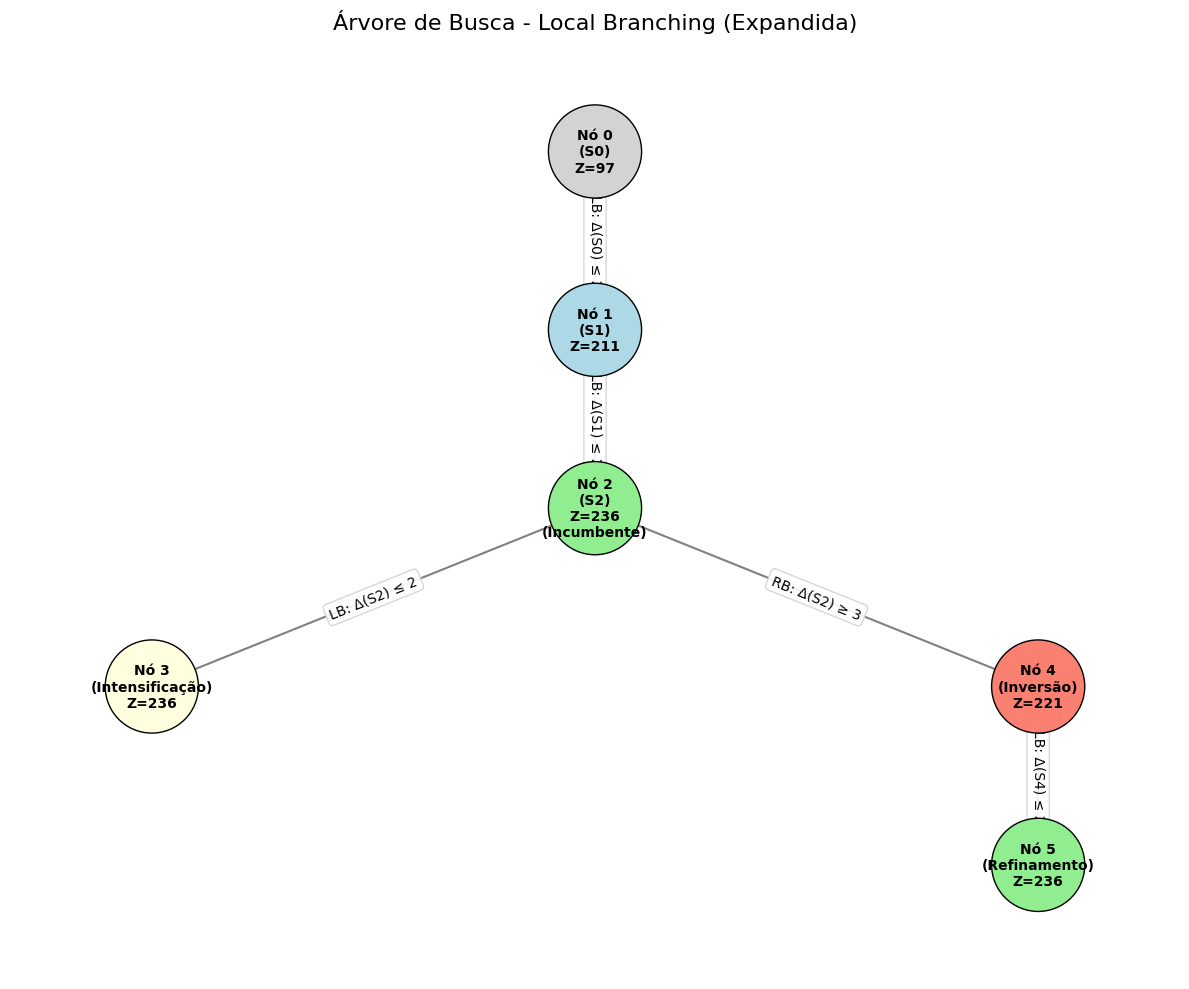

In [74]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_local_branching_tree_expanded():
    # Cria o grafo direcionado
    G = nx.DiGraph()

    # Definição dos nós com POSIÇÕES EXPANDIDAS
    # Aumentei o espaçamento vertical (Y) e horizontal (X)
    nodes = {
        "N0": {"label": "Nó 0\n(S0)\nZ=97", "pos": (0, 0), "color": "lightgray"},

        # Aumentei a distância vertical de -1 para -2
        "N1": {"label": "Nó 1\n(S1)\nZ=211", "pos": (0, -2), "color": "lightblue"},

        # Aumentei a distância vertical de -2 para -4
        "N2": {"label": "Nó 2\n(S2)\nZ=236\n(Incumbente)", "pos": (0, -4), "color": "lightgreen"},

        # Afastei mais para a esquerda (-3) e para baixo (-6)
        "N3": {"label": "Nó 3\n(Intensificação)\nZ=236", "pos": (-3, -6), "color": "lightyellow"},

        # Afastei mais para a direita (3) e para baixo (-6)
        "N4": {"label": "Nó 4\n(Inversão)\nZ=221", "pos": (3, -6), "color": "salmon"},

        # Desci mais este nó para -8
        "N5": {"label": "Nó 5\n(Refinamento)\nZ=236", "pos": (3, -8), "color": "lightgreen"}
    }

    # Adiciona nós ao grafo
    for node, attrs in nodes.items():
        G.add_node(node, label=attrs["label"])

    # Definição das arestas e rótulos
    edges = [
        ("N0", "N1", "LB: Δ(S0) ≤ 2"),
        ("N1", "N2", "LB: Δ(S1) ≤ 2"),
        ("N2", "N3", "LB: Δ(S2) ≤ 2"),
        ("N2", "N4", "RB: Δ(S2) ≥ 3"),  # Right Branch / Inversão
        ("N4", "N5", "LB: Δ(S4) ≤ 2")
    ]

    # Adiciona arestas
    for u, v, label in edges:
        G.add_edge(u, v, label=label)

    # Configuração do Plot (Tamanho da figura aumentado)
    plt.figure(figsize=(12, 10))
    pos = {n: attrs["pos"] for n, attrs in nodes.items()}

    # 1. Desenha nós
    node_colors = [nodes[n]["color"] for n in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=4500, node_color=node_colors, edgecolors='black')

    # 2. Desenha rótulos dos nós
    labels = {n: nodes[n]["label"] for n in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=10, font_weight="bold")

    # 3. Desenha arestas (setas)
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=25, edge_color='gray', width=1.5)

    # 4. Desenha rótulos das arestas (com fundo branco para leitura)
    edge_labels = {(u, v): d["label"] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=edge_labels,
        font_size=10,
        bbox=dict(facecolor='white', edgecolor='lightgray', alpha=0.9, boxstyle='round,pad=0.3')
    )

    plt.title("Árvore de Busca - Local Branching (Expandida)", fontsize=16)
    plt.axis('off')

    # Margem extra para não cortar nada
    plt.margins(0.1)
    plt.tight_layout()
    plt.show()

plot_local_branching_tree_expanded()